In [131]:
#imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [132]:
# Store filepath in a variable
file = Path("owid-covid-data.csv")
file_df = pd.read_csv(file)
file_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302507,ZWE,Africa,Zimbabwe,2023-04-08,264578.0,2.0,4.143,5684.0,1.0,0.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
302508,ZWE,Africa,Zimbabwe,2023-04-09,264582.0,4.0,4.714,5684.0,0.0,0.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
302509,ZWE,Africa,Zimbabwe,2023-04-10,264584.0,2.0,4.143,5684.0,0.0,0.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
302510,ZWE,Africa,Zimbabwe,2023-04-11,264584.0,0.0,3.143,5684.0,0.0,0.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [133]:
# filtering the columns to only keep the ones specified and removing rows with empty data
files_df = file_df[['continent', 'location', 'date','population', 'total_cases', 'total_deaths', 'icu_patients', 'hosp_patients', 'total_tests', 'positive_rate', 'tests_units','people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'population_density', 'median_age', 'aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence']]
filies_df = files_df.dropna(how='any')
filies_df

,continent,location,date,population,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,positive_rate,...,people_vaccinated,people_fully_vaccinated,total_boosters,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence
16193,Oceania,Australia,2021-10-07,26177410.0,117770.0,1470.0,293.0,1522.0,39191561.0,0.0114,...,17408468.0,12503241.0,151.0,3.202,37.9,15.504,10.129,44648.710,107.791,5.07
16194,Oceania,Australia,2021-10-08,26177410.0,120043.0,1493.0,287.0,1437.0,39403312.0,0.0115,...,17521126.0,12720856.0,292.0,3.202,37.9,15.504,10.129,44648.710,107.791,5.07
16195,Oceania,Australia,2021-10-09,26177410.0,122506.0,1504.0,293.0,1446.0,39581452.0,0.0121,...,17593798.0,12883681.0,433.0,3.202,37.9,15.504,10.129,44648.710,107.791,5.07
16196,Oceania,Australia,2021-10-10,26177410.0,125051.0,1526.0,296.0,1492.0,39758570.0,0.0122,...,17644750.0,12998286.0,481.0,3.202,37.9,15.504,10.129,44648.710,107.791,5.07
16197,Oceania,Australia,2021-10-11,26177410.0,127423.0,1541.0,309.0,1486.0,39943975.0,0.0117,...,17742605.0,13212457.0,715.0,3.202,37.9,15.504,10.129,44648.710,107.791,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285560,North America,United States,2022-06-14,338289856.0,84664970.0,1002944.0,2999.0,26042.0,911039148.0,0.1270,...,259353061.0,223029633.0,123139146.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79
285561,North America,United States,2022-06-15,338289856.0,84756328.0,1003230.0,2994.0,26413.0,911642612.0,0.1330,...,259394474.0,223064339.0,123335005.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79
285562,North America,United States,2022-06-16,338289856.0,84894338.0,1003649.0,3043.0,26235.0,912115224.0,0.1360,...,259435866.0,223097999.0,123529208.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79
285563,North America,United States,2022-06-17,338289856.0,85037513.0,1004218.0,2996.0,26221.0,912521698.0,0.1380,...,259479523.0,223134513.0,123733694.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79


In [134]:
#count of how many countries are in the dataframe after filtering
filies_df['location'].nunique()

27

In [135]:
filies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 16193 to 285564
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continent                5377 non-null   object 
 1   location                 5377 non-null   object 
 2   date                     5377 non-null   object 
 3   population               5377 non-null   float64
 4   total_cases              5377 non-null   float64
 5   total_deaths             5377 non-null   float64
 6   icu_patients             5377 non-null   float64
 7   hosp_patients            5377 non-null   float64
 8   total_tests              5377 non-null   float64
 9   positive_rate            5377 non-null   float64
 10  tests_units              5377 non-null   object 
 11  people_vaccinated        5377 non-null   float64
 12  people_fully_vaccinated  5377 non-null   float64
 13  total_boosters           5377 non-null   float64
 14  population_density

In [136]:
#here, we found the last date that each country was logged to get the final results that were logged
Countries_df = filies_df.sort_values('date').groupby('location').tail(1)
Countries_df.head()


,continent,location,date,population,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,positive_rate,...,people_vaccinated,people_fully_vaccinated,total_boosters,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence
154637,Europe,Luxembourg,2021-04-13,647601.0,63879.0,780.0,33.0,122.0,2530488.0,0.0230,...,103569.0,37868.0,1.0,231.447,39.7,14.312,9.842,94277.965,128.275,4.42
65345,Europe,Cyprus,2022-01-31,896007.0,250587.0,749.0,35.0,204.0,22745986.0,0.0208,...,659912.0,629299.0,404293.0,127.657,37.3,13.416,8.563,32415.132,141.171,9.24
216184,Europe,Portugal,2022-03-11,10270857.0,3497313.0,21298.0,65.0,1111.0,39057671.0,0.2300,...,9721307.0,8783540.0,6287012.0,112.371,46.2,21.502,14.924,27936.896,127.842,9.85
16375,Oceania,Australia,2022-04-07,26177410.0,4657049.0,6944.0,95.0,2818.0,67351674.0,0.4944,...,22231734.0,21348489.0,13088177.0,3.202,37.9,15.504,10.129,44648.710,107.791,5.07
284338,Europe,United Kingdom,2022-05-19,67508936.0,22227349.0,178266.0,191.0,6819.0,503270347.0,0.0326,...,53407449.0,49903328.0,39604509.0,272.898,40.8,18.517,12.527,39753.244,122.137,4.28


In [137]:
# make a new file called total_cases_per_population that gives the ratio of total cases to the overall population
Countries_df['total_cases_per_population'] = Countries_df['total_cases'] / Countries_df['population']
Countries_df.head()

,continent,location,date,population,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,positive_rate,...,people_fully_vaccinated,total_boosters,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,total_cases_per_population
154637,Europe,Luxembourg,2021-04-13,647601.0,63879.0,780.0,33.0,122.0,2530488.0,0.0230,...,37868.0,1.0,231.447,39.7,14.312,9.842,94277.965,128.275,4.42,0.098639
65345,Europe,Cyprus,2022-01-31,896007.0,250587.0,749.0,35.0,204.0,22745986.0,0.0208,...,629299.0,404293.0,127.657,37.3,13.416,8.563,32415.132,141.171,9.24,0.279671
216184,Europe,Portugal,2022-03-11,10270857.0,3497313.0,21298.0,65.0,1111.0,39057671.0,0.2300,...,8783540.0,6287012.0,112.371,46.2,21.502,14.924,27936.896,127.842,9.85,0.340508
16375,Oceania,Australia,2022-04-07,26177410.0,4657049.0,6944.0,95.0,2818.0,67351674.0,0.4944,...,21348489.0,13088177.0,3.202,37.9,15.504,10.129,44648.710,107.791,5.07,0.177903
284338,Europe,United Kingdom,2022-05-19,67508936.0,22227349.0,178266.0,191.0,6819.0,503270347.0,0.0326,...,49903328.0,39604509.0,272.898,40.8,18.517,12.527,39753.244,122.137,4.28,0.329250


In [138]:
# made a new df that will have columns that will later be looked at
country_final_df = Countries_df[['location','population','total_cases','total_deaths','total_cases_per_population','positive_rate','people_fully_vaccinated','total_boosters','median_age','hosp_patients','gdp_per_capita','diabetes_prevalence']]
country_final_df.head()

,location,population,total_cases,total_deaths,total_cases_per_population,positive_rate,people_fully_vaccinated,total_boosters,median_age,hosp_patients,gdp_per_capita,diabetes_prevalence
154637,Luxembourg,647601.0,63879.0,780.0,0.098639,0.0230,37868.0,1.0,39.7,122.0,94277.965,4.42
65345,Cyprus,896007.0,250587.0,749.0,0.279671,0.0208,629299.0,404293.0,37.3,204.0,32415.132,9.24
216184,Portugal,10270857.0,3497313.0,21298.0,0.340508,0.2300,8783540.0,6287012.0,46.2,1111.0,27936.896,9.85
16375,Australia,26177410.0,4657049.0,6944.0,0.177903,0.4944,21348489.0,13088177.0,37.9,2818.0,44648.710,5.07
284338,United Kingdom,67508936.0,22227349.0,178266.0,0.329250,0.0326,49903328.0,39604509.0,40.8,6819.0,39753.244,4.28


In [139]:
#made new columns that were divided by the population to get the ratio so it can be compared with other countries
country_final_df['total_deaths_per_population'] = country_final_df['total_deaths'] / country_final_df['population']
country_final_df['vaccinations_per_population'] = country_final_df['people_fully_vaccinated'] / country_final_df['population']
country_final_df['boosters_per_population'] = country_final_df['total_boosters'] / country_final_df['population']
country_final_df['hosps_per_population']= country_final_df['hosp_patients'] / country_final_df['population']
country_final_df.head()

C:\Users\murta\AppData\Local\Temp\ipykernel_10288\2410158612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_final_df['total_deaths_per_population'] = country_final_df['total_deaths'] / country_final_df['population']
C:\Users\murta\AppData\Local\Temp\ipykernel_10288\2410158612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_final_df['vaccinations_per_population'] = country_final_df['people_fully_vaccinated'] / country_final_df['population']
C:\Users\murta\AppData\Local\Temp\ipykernel

,location,population,total_cases,total_deaths,total_cases_per_population,positive_rate,people_fully_vaccinated,total_boosters,median_age,hosp_patients,gdp_per_capita,diabetes_prevalence,total_deaths_per_population,vaccinations_per_population,boosters_per_population,hosps_per_population
154637,Luxembourg,647601.0,63879.0,780.0,0.098639,0.0230,37868.0,1.0,39.7,122.0,94277.965,4.42,0.001204,0.058474,0.000002,0.000188
65345,Cyprus,896007.0,250587.0,749.0,0.279671,0.0208,629299.0,404293.0,37.3,204.0,32415.132,9.24,0.000836,0.702337,0.451216,0.000228
216184,Portugal,10270857.0,3497313.0,21298.0,0.340508,0.2300,8783540.0,6287012.0,46.2,1111.0,27936.896,9.85,0.002074,0.855191,0.612121,0.000108
16375,Australia,26177410.0,4657049.0,6944.0,0.177903,0.4944,21348489.0,13088177.0,37.9,2818.0,44648.710,5.07,0.000265,0.815531,0.499980,0.000108
284338,United Kingdom,67508936.0,22227349.0,178266.0,0.329250,0.0326,49903328.0,39604509.0,40.8,6819.0,39753.244,4.28,0.002641,0.739211,0.586656,0.000101


In [143]:
#organized and cleaned the dataset
Country_per_pop = country_final_df[['location','total_cases_per_population','total_deaths_per_population','vaccinations_per_population','boosters_per_population','positive_rate','median_age','population','gdp_per_capita','hosps_per_population','diabetes_prevalence']]
Country_per_pop.head()

,location,total_cases_per_population,total_deaths_per_population,vaccinations_per_population,boosters_per_population,positive_rate,median_age,population,gdp_per_capita,hosps_per_population,diabetes_prevalence
154637,Luxembourg,0.098639,0.001204,0.058474,0.000002,0.0230,39.7,647601.0,94277.965,0.000188,4.42
65345,Cyprus,0.279671,0.000836,0.702337,0.451216,0.0208,37.3,896007.0,32415.132,0.000228,9.24
216184,Portugal,0.340508,0.002074,0.855191,0.612121,0.2300,46.2,10270857.0,27936.896,0.000108,9.85
16375,Australia,0.177903,0.000265,0.815531,0.499980,0.4944,37.9,26177410.0,44648.710,0.000108,5.07
284338,United Kingdom,0.329250,0.002641,0.739211,0.586656,0.0326,40.8,67508936.0,39753.244,0.000101,4.28


In [144]:
#made a new df that shows only the percentages for each given country of the columns previously made
Country_percentage = pd.DataFrame()
Country_percentage

""


In [146]:
#here we added the percent format to all of the columns
Country_percentage['%_cases_per_population']= Country_per_pop['total_cases_per_population']*100
Country_percentage['location']= Country_per_pop['location']
Country_percentage['%_deaths_per_population'] = Country_per_pop['total_deaths_per_population']*100
Country_percentage['%_vaccinated_per_population'] = Country_per_pop['vaccinations_per_population']*100
Country_percentage['%_boosters_per_population'] = Country_per_pop['boosters_per_population']*100
Country_percentage['%_deaths_per_population'] = Country_per_pop['total_deaths_per_population']*100
Country_percentage['population'] = Country_per_pop['population']
Country_percentage['gdp_per_capita'] = Country_per_pop['gdp_per_capita']
Country_percentage['%_diabetes_prevalence'] = Country_per_pop['diabetes_prevalence']
Country_percentage['%_hosps_per_population'] = Country_per_pop['hosps_per_population']*100
Country_percentage[['location','population','%_cases_per_population','%_deaths_per_population','%_vaccinated_per_population','%_boosters_per_population','%_hosps_per_population','gdp_per_capita','%_diabetes_prevalence']]

,location,population,%_cases_per_population,%_deaths_per_population,%_vaccinated_per_population,%_boosters_per_population,%_hosps_per_population,gdp_per_capita,%_diabetes_prevalence
154637,Luxembourg,647601.0,9.863944,0.120445,5.847428,0.000154,0.018839,94277.965,4.42
65345,Cyprus,896007.0,27.967081,0.083593,70.233715,45.121634,0.022768,32415.132,9.24
216184,Portugal,10270857.0,34.050839,0.207363,85.519056,61.212146,0.010817,27936.896,9.85
16375,Australia,26177410.0,17.790335,0.026527,81.553099,49.997983,0.010765,44648.710,5.07
284338,United Kingdom,67508936.0,32.925047,0.264063,73.921070,58.665580,0.010101,39753.244,4.28
46332,Canada,38454328.0,10.080956,0.107278,81.674180,55.871160,0.009986,44017.591,7.37
253282,South Korea,51815808.0,35.199768,0.047088,85.499545,72.643385,0.000942,35938.374,6.80
255675,Spain,47558632.0,26.390881,0.228020,85.240564,53.140662,0.013455,34272.360,7.17
90512,Finland,5540745.0,20.372116,0.089446,78.182356,58.995875,0.006335,40585.721,5.76
69070,Denmark,5882259.0,53.540740,0.109159,80.589158,61.192324,0.003842,46682.515,6.41


The r-squared is: 0.07459382788591065
y = 0.21x + 15.37


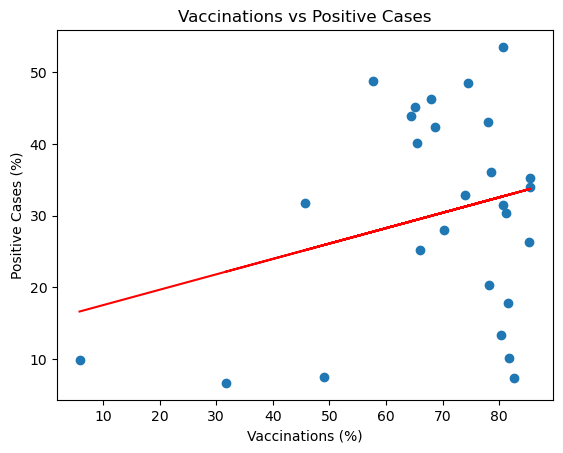

In [160]:
#made a scatter plot of Vaccinations VS Positive Cases
x_axis= Country_percentage['%_vaccinated_per_population']
y_axis=  Country_percentage['%_cases_per_population']
slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis, y_axis)
#plt.xlim(0, 60)
#plt.ylim(0, 90)
plt.plot(x_axis,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Vaccinations vs Positive Cases")
plt.xlabel("Vaccinations (%)")
plt.ylabel("Positive Cases (%)")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

The r-squared is: 0.03257792304763469


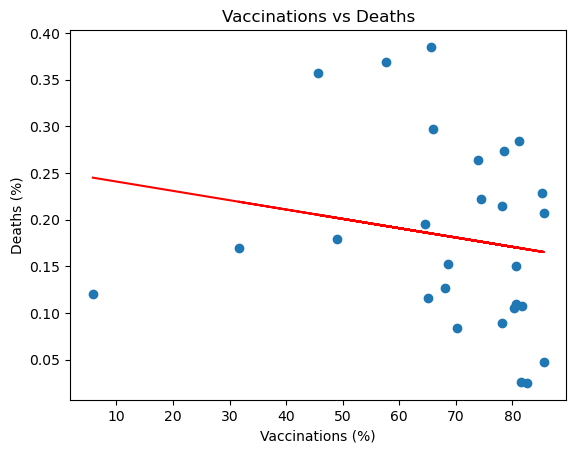

In [159]:
#Made a scatter plot of Vaccinations vs Deaths
x_axis= Country_percentage['%_vaccinated_per_population']
y_axis=  Country_percentage['%_deaths_per_population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Vaccinations vs Deaths")
plt.xlabel("Vaccinations (%)")
plt.ylabel("Deaths (%)")
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.13329843189491053


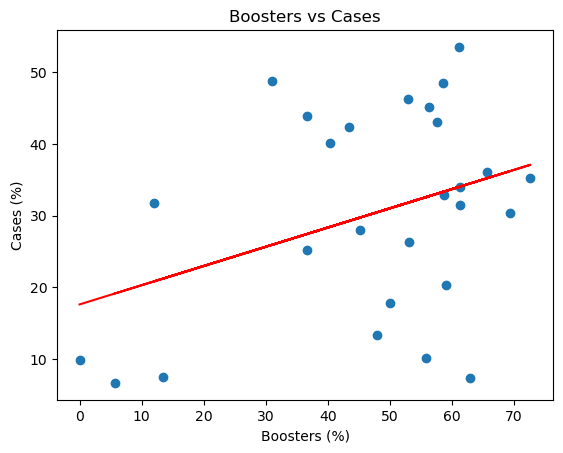

In [149]:
#Made a scatter plot of Boosters vs Cases
x_axis= Country_percentage['%_boosters_per_population']
y_axis=  Country_percentage['%_cases_per_population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Boosters vs Cases")
plt.xlabel("Boosters (%)")
plt.ylabel("Cases (%)")
print(f"The r-squared is: {rvalue**2}")

In [150]:
#get the country_percentage columns
Country_percentage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 154637 to 250898
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   %_cases_per_population       27 non-null     float64
 1   location                     27 non-null     object 
 2   %_deaths_per_population      27 non-null     float64
 3   %_vaccinated_per_population  27 non-null     float64
 4   %_boosters_per_population    27 non-null     float64
 5   population                   27 non-null     float64
 6   gdp_per_capita               27 non-null     float64
 7   %_diabetes_prevalence        27 non-null     float64
 8   %_hosps_per_population       27 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.1+ KB


In [151]:
#Got the median age of covid victims
Country_per_pop['median_age'].mean()

40.36296296296295

The r-squared is: 0.005118975966555018


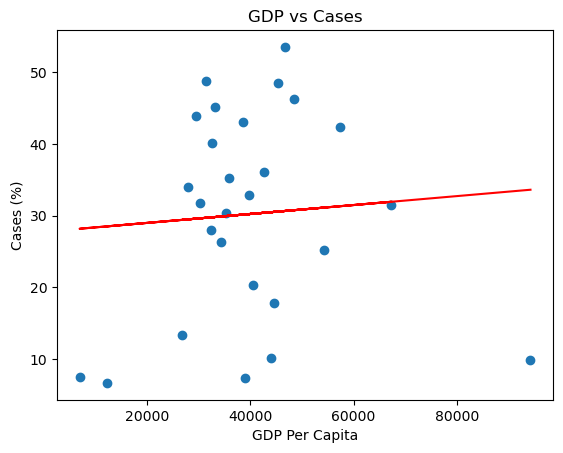

In [152]:
#made a scatter plot of GDP and Cases in a country
x_axis= Country_percentage['gdp_per_capita']
y_axis=  Country_percentage['%_cases_per_population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("GDP vs Cases")
plt.xlabel("GDP Per Capita")
plt.ylabel("Cases (%)")
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.002663234187759335


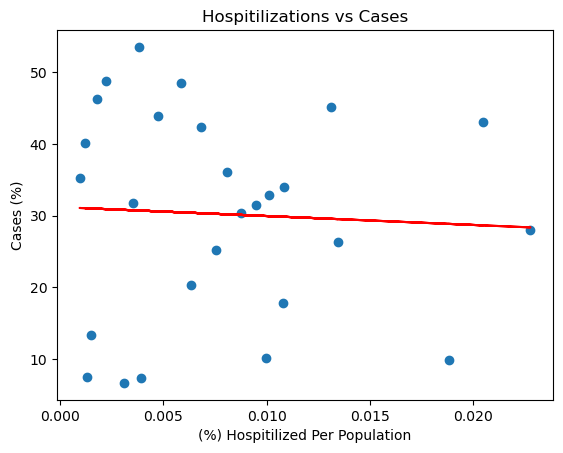

In [153]:
#made a scatter plot of Hospitilizations vs Cases
x_axis= Country_percentage['%_hosps_per_population']
y_axis=  Country_percentage['%_cases_per_population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Hospitilizations vs Cases")
plt.xlabel("(%) Hospitilized Per Population")
plt.ylabel("Cases (%)")
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.13751709510884047


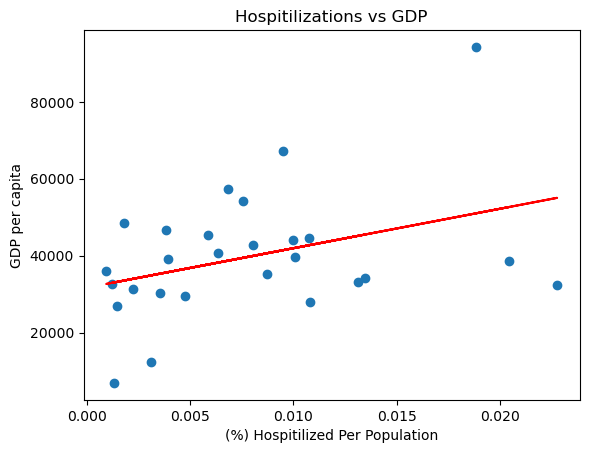

In [154]:
#Made a scatter plot of Hospitilizations vs GDP
x_axis= Country_percentage['%_hosps_per_population']
y_axis=  Country_percentage['gdp_per_capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Hospitilizations vs GDP")
plt.xlabel("(%) Hospitilized Per Population")
plt.ylabel("GDP per capita")
print(f"The r-squared is: {rvalue**2}")

In [155]:
#got the country_percentage columns
Country_percentage.columns

Index(['%_cases_per_population', 'location', '%_deaths_per_population',
       '%_vaccinated_per_population', '%_boosters_per_population',
       'population', 'gdp_per_capita', '%_diabetes_prevalence',
       '%_hosps_per_population'],
      dtype='object')

The r-squared is: 0.039442408139996964


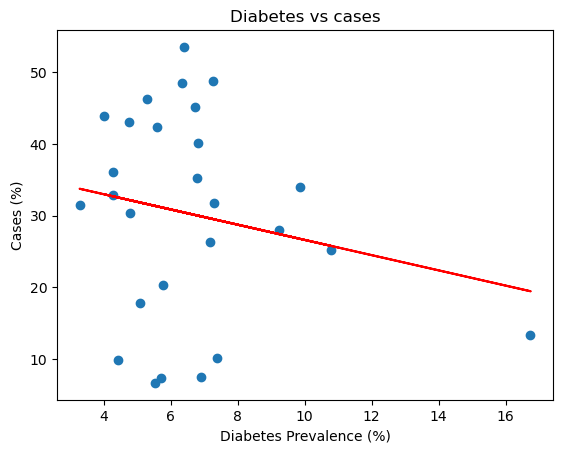

In [156]:
#made a scatter plot of Diabetes Prevalence and Cases
x_axis= Country_percentage['%_diabetes_prevalence']
y_axis=  Country_percentage['%_cases_per_population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Diabetes vs cases")
plt.xlabel("Diabetes Prevalence (%)")
plt.ylabel("Cases (%)")
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.00031670623648438805


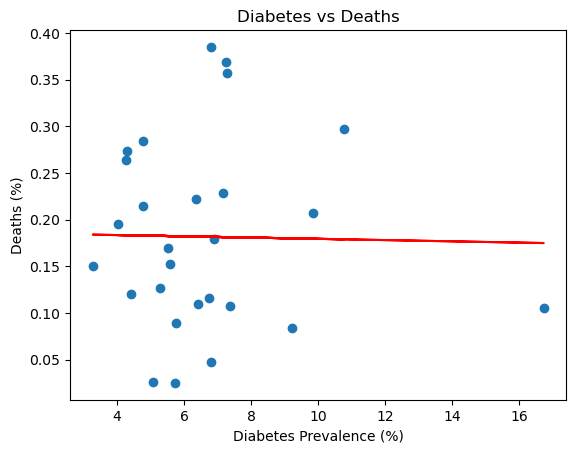

In [158]:
#made a scatter plot of Diabetes Prevalence and Deaths
x_axis= Country_percentage['%_diabetes_prevalence']
y_axis=  Country_percentage['%_deaths_per_population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Diabetes vs Deaths")
plt.xlabel("Diabetes Prevalence (%)")
plt.ylabel("Deaths (%)")
print(f"The r-squared is: {rvalue**2}")

In [4]:
import database

table_name = 'covid_data'
filies_df.to_sql(table_name, database.conn, if_exists='replace', index=False)
database.conn.commit()
database.conn.close()